# Semester project

* Name and Matriculation number
* Name and Matriculation number

## Task 1

In [175]:
#Import Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm 
sns.set(style="whitegrid")

%matplotlib inline


In [77]:
df=pd.read_csv("customer_churn.csv")

In [78]:
df.head()

,customer_id,gender,partner,family,senior,mobile,dual_sim,device_insurance,internet,web_security,...,support,tv_replay,video_on_demand,subscription,paperless_invoice,payment_method,monthly_fee,months,total_revenue,churn
0,APPT-001233,female,no,yes,no,yes,yes,no,fiber_optic,no,...,yes,no,no,one_year,yes,credit_card,79.50,16,1264.2,no
1,APPT-001250,male,yes,yes,no,yes,no,no,no_internet,no,...,no,no,no,one_year,yes,direct_debit,19.70,0,NaN,no
2,APPT-001276,female,no,no,no,no,no,yes,dsl,yes,...,yes,yes,yes,two_years,yes,direct_debit,63.40,6,348.8,no
3,APPT-001322,female,no,no,no,yes,no,no,no_internet,no,...,no,no,no,one_year,yes,direct_debit,20.65,42,958.1,no
4,APPT-001362,female,no,yes,no,yes,no,no,no_internet,no,...,no,no,no,one_year,yes,credit_card,20.10,35,644.5,no


In [79]:
df.shape

(7043, 21)

In [80]:
df.info

<bound method DataFrame.info of       customer_id  gender partner family senior mobile dual_sim  \
0     APPT-001233  female      no    yes     no    yes      yes   
1     APPT-001250    male     yes    yes     no    yes       no   
2     APPT-001276  female      no     no     no     no       no   
3     APPT-001322  female      no     no     no    yes       no   
4     APPT-001362  female      no    yes     no    yes       no   
5     APPT-001392    male      no     no     no    yes       no   
6     APPT-001481    male     yes    yes     no    yes      yes   
7     APPT-001516    male      no     no     no    yes      yes   
8     APPT-001521  female     yes     no     no    yes      yes   
9     APPT-001523    male     yes    yes     no    yes       no   
10    APPT-001525  female     yes    yes     no    yes       no   
11    APPT-001602    male      no    yes     no     no       no   
12    APPT-001631  female     yes     no     no    yes       no   
13    APPT-001753  female     

In [4]:
#Data is successfully loaded into df pandas dataframe

In [49]:
#a


In [81]:
df.dtypes

customer_id           object
gender                object
partner               object
family                object
senior                object
mobile                object
dual_sim              object
device_insurance      object
internet              object
web_security          object
cloud                 object
support               object
tv_replay             object
video_on_demand       object
subscription          object
paperless_invoice     object
payment_method        object
monthly_fee          float64
months                 int64
total_revenue        float64
churn                 object
dtype: object

In [82]:
#Setting customer_id as index
df.set_index('customer_id')

,gender,partner,family,senior,mobile,dual_sim,device_insurance,internet,web_security,cloud,support,tv_replay,video_on_demand,subscription,paperless_invoice,payment_method,monthly_fee,months,total_revenue,churn
customer_id,,,,,,,,,,,,,,,,,,,,
APPT-001233,female,no,yes,no,yes,yes,no,fiber_optic,no,no,yes,no,no,one_year,yes,credit_card,79.50,16,1264.20,no
APPT-001250,male,yes,yes,no,yes,no,no,no_internet,no,no,no,no,no,one_year,yes,direct_debit,19.70,0,NaN,no
APPT-001276,female,no,no,no,no,no,yes,dsl,yes,yes,yes,yes,yes,two_years,yes,direct_debit,63.40,6,348.80,no
APPT-001322,female,no,no,no,yes,no,no,no_internet,no,no,no,no,no,one_year,yes,direct_debit,20.65,42,958.10,no
APPT-001362,female,no,yes,no,yes,no,no,no_internet,no,no,no,no,no,one_year,yes,credit_card,20.10,35,644.50,no
APPT-001392,male,no,no,no,yes,no,no,dsl,yes,no,no,no,no,one_month,yes,bank_transfer,49.55,24,1210.40,yes
APPT-001481,male,yes,yes,no,yes,yes,no,no_internet,no,no,no,no,no,two_years,yes,direct_debit,23.80,39,903.80,no
APPT-001516,male,no,no,no,yes,yes,yes,dsl,no,no,yes,no,no,one_month,no,e_invoice,59.45,27,1611.65,no
APPT-001521,female,yes,no,no,yes,yes,no,fiber_optic,no,no,no,yes,no,one_month,yes,e_invoice,86.85,19,1564.40,no


In [83]:
#Following Statistics summary for three numeric columns
df.describe()

,monthly_fee,months,total_revenue
count,7043.000000,7043.000000,7032.000000
mean,64.761692,32.371149,2283.300441
std,30.090047,24.559481,2266.771362
min,18.250000,0.000000,18.800000
25%,35.500000,9.000000,401.450000
50%,70.350000,29.000000,1397.475000
75%,89.850000,55.000000,3794.737500
max,118.750000,72.000000,8684.800000


In [47]:
#b


In [84]:
#Which attribute has missing values.
df.isnull().values.any

<function ndarray.any>

In [ ]:
# True shows we have missing values in our dataframe
# Lets find out the column names with missing values

In [85]:
df.isnull().sum()

customer_id           0
gender                0
partner               0
family                0
senior                0
mobile                0
dual_sim              0
device_insurance      0
internet              0
web_security          0
cloud                 0
support               0
tv_replay             0
video_on_demand       0
subscription          0
paperless_invoice     0
payment_method        0
monthly_fee           0
months                0
total_revenue        11
churn                 0
dtype: int64

In [51]:
#We have 11 missing values in total_revenue column.

In [52]:
#C


In [86]:
print(df[df["total_revenue"].isnull()]['total_revenue'])

1      NaN
939    NaN
1682   NaN
2925   NaN
3229   NaN
3951   NaN
4984   NaN
5039   NaN
5186   NaN
5831   NaN
6636   NaN
Name: total_revenue, dtype: float64


In [ ]:
#These are the rows with null values

In [87]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df)

,customer_id,gender,partner,family,senior,mobile,dual_sim,device_insurance,internet,web_security,...,support,tv_replay,video_on_demand,subscription,paperless_invoice,payment_method,monthly_fee,months,total_revenue,churn
1,APPT-001250,male,yes,yes,no,yes,no,no,no_internet,no,...,no,no,no,one_year,yes,direct_debit,19.70,0,NaN,no
939,APPT-066869,female,yes,yes,no,yes,no,no,no_internet,no,...,no,no,no,two_years,no,direct_debit,20.00,0,NaN,no
1682,APPT-119342,female,yes,yes,no,yes,no,yes,dsl,yes,...,no,yes,yes,two_years,no,direct_debit,80.85,0,NaN,no
2925,APPT-206224,male,no,yes,no,yes,yes,no,dsl,yes,...,yes,no,no,two_years,yes,bank_transfer,61.90,0,NaN,no
3229,APPT-230265,male,yes,yes,no,yes,yes,no,no_internet,no,...,no,no,no,two_years,no,direct_debit,25.75,0,NaN,no
3951,APPT-280255,male,no,yes,no,yes,no,no,no_internet,no,...,no,no,no,two_years,no,direct_debit,20.25,0,NaN,no
4984,APPT-357475,female,yes,yes,no,yes,yes,yes,dsl,no,...,yes,yes,no,two_years,no,direct_debit,73.35,0,NaN,no
5039,APPT-360595,male,yes,yes,no,yes,no,no,no_internet,no,...,no,no,no,two_years,no,direct_debit,19.85,0,NaN,no
5186,APPT-369589,male,yes,yes,no,yes,yes,no,no_internet,no,...,no,no,no,two_years,no,direct_debit,25.35,0,NaN,no
5831,APPT-416842,female,yes,yes,no,no,no,yes,dsl,yes,...,yes,yes,no,two_years,yes,bank_transfer,52.55,0,NaN,no


In [ ]:
#In all rows where we have null values we can see that the reasons is
    # months colum is 0
    # senior column is no

In [53]:
#d


In [59]:
#How to deal with missing values.

In [60]:
#We have 7043 records in our dataset and have only 11 missing values which are 0.15 of our dataset.
#it means 6th part of one percent of dataset.
#We have one identity of months column that it is 0 for all rows and senior column is no
#Rest of the columns have mixed values.

In [ ]:
#We should remove the missing values so it has no effect on our dataset.
#We can use our new dataset for further processing

In [88]:
#Removing missing values
df.dropna(axis=0,inplace=True)

In [89]:
#Can verify we have no missing values now
df.isnull().sum()

customer_id          0
gender               0
partner              0
family               0
senior               0
mobile               0
dual_sim             0
device_insurance     0
internet             0
web_security         0
cloud                0
support              0
tv_replay            0
video_on_demand      0
subscription         0
paperless_invoice    0
payment_method       0
monthly_fee          0
months               0
total_revenue        0
churn                0
dtype: int64

In [68]:
#e


In [69]:
#Discover inconsistencies

In [90]:
df.head(10)

,customer_id,gender,partner,family,senior,mobile,dual_sim,device_insurance,internet,web_security,...,support,tv_replay,video_on_demand,subscription,paperless_invoice,payment_method,monthly_fee,months,total_revenue,churn
0,APPT-001233,female,no,yes,no,yes,yes,no,fiber_optic,no,...,yes,no,no,one_year,yes,credit_card,79.50,16,1264.20,no
2,APPT-001276,female,no,no,no,no,no,yes,dsl,yes,...,yes,yes,yes,two_years,yes,direct_debit,63.40,6,348.80,no
3,APPT-001322,female,no,no,no,yes,no,no,no_internet,no,...,no,no,no,one_year,yes,direct_debit,20.65,42,958.10,no
4,APPT-001362,female,no,yes,no,yes,no,no,no_internet,no,...,no,no,no,one_year,yes,credit_card,20.10,35,644.50,no
5,APPT-001392,male,no,no,no,yes,no,no,dsl,yes,...,no,no,no,one_month,yes,bank_transfer,49.55,24,1210.40,yes
6,APPT-001481,male,yes,yes,no,yes,yes,no,no_internet,no,...,no,no,no,two_years,yes,direct_debit,23.80,39,903.80,no
7,APPT-001516,male,no,no,no,yes,yes,yes,dsl,no,...,yes,no,no,one_month,no,e_invoice,59.45,27,1611.65,no
8,APPT-001521,female,yes,no,no,yes,yes,no,fiber_optic,no,...,no,yes,no,one_month,yes,e_invoice,86.85,19,1564.40,no
9,APPT-001523,male,yes,yes,no,yes,no,yes,fiber_optic,yes,...,no,no,no,two_years,no,credit_card,80.35,68,5375.15,no
10,APPT-001525,female,yes,yes,no,yes,no,no,no_internet,no,...,no,no,no,two_years,no,direct_debit,19.70,30,599.25,no


In [ ]:
#Our dataset is normaly distributed and no inconsistency can be seen. 

In [ ]:
#Task 2
# Visulization


In [123]:
#a


In [127]:
df1=df
df1.monthly_fee.unique()


array([79.5 , 63.4 , 20.65, ..., 35.35, 77.  , 77.65])

In [115]:

df.churn.unique()
df.churn=df.churn.replace('no',0)
df.churn=df.churn.replace('yes',1)
df.churn.unique()
df.dtypes

customer_id           object
gender                object
partner               object
family                object
senior                object
mobile                object
dual_sim              object
device_insurance      object
internet              object
web_security          object
cloud                 object
support               object
tv_replay             object
video_on_demand       object
subscription          object
paperless_invoice     object
payment_method        object
monthly_fee          float64
months                 int64
total_revenue        float64
churn                  int64
dtype: object

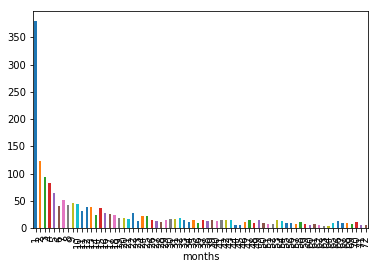

In [142]:
df['churn'].groupby(df['months']).sum().plot.bar()

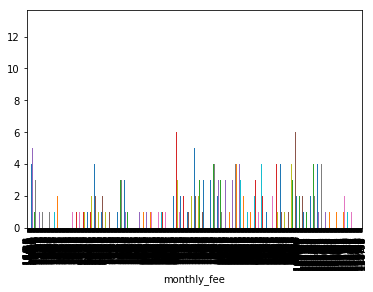

In [143]:
df['churn'].groupby(df['monthly_fee']).sum().plot.bar()

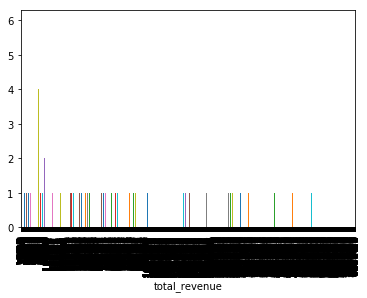

In [144]:
df['churn'].groupby(df['total_revenue']).sum().plot.bar()

C:\Users\Junaid Rana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


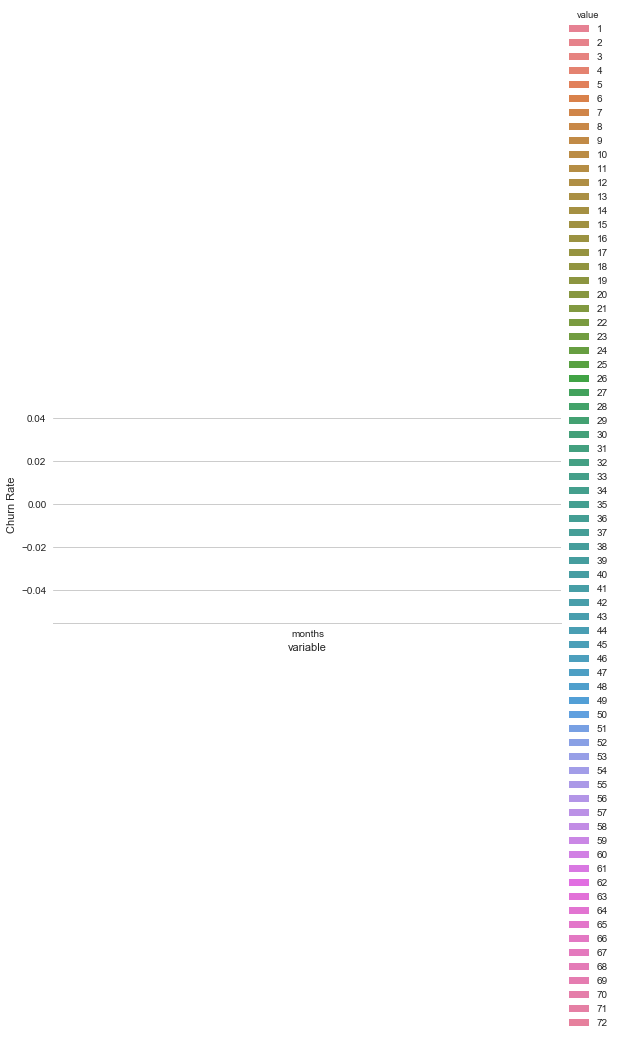

In [151]:
# Create a new temporary dataframe to help us plot these variables.
df1 = pd.melt(df, id_vars=['Churn'], value_vars=["months"], var_name='variable' )

# Create a factorplot
g = sns.factorplot( x="variable", y="Churn", hue='value', data=df1, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

C:\Users\Junaid Rana\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


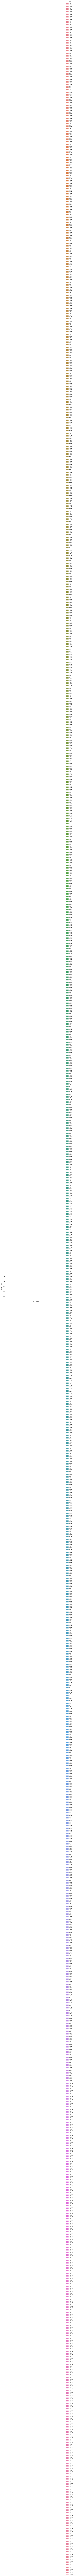

In [152]:
# Create a new temporary dataframe to help us plot these variables.
df2 = pd.melt(df, id_vars=['Churn'], value_vars=["monthly_fee"], var_name='variable' )

# Create a factorplot
g = sns.factorplot( x="variable", y="Churn", hue='value', data=df2, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

In [ ]:
#I have displayed churn rate for two columns. for the sack of better understanding and shorten code.
# You can change the columns names in value_vars and get for rest of the coumns.
#B
#Will be done by same code.

In [ ]:
#c


In [ ]:
#To check how the customer has developed in last 12 months

In [ ]:
#To check this we needs data or time for customer segment on monthly basis.
#no column or fields are related to help this question.
#i am attaching the code for make sure how the customer can be categorized on monthly basis.

In [156]:
dt.datetime.now()
#df.resample('M').sum()
#We have dattime object , by using this we can resample dataframe on minutes, days and monthly basis. 
#but we dont have time in our scenerio.

datetime.datetime(2018, 11, 8, 11, 17, 8, 819087)

In [ ]:
#Task 3


In [157]:
#Clustering 

-------------
[[53. 54.]
 [68. 37.]
 [45.  5.]]


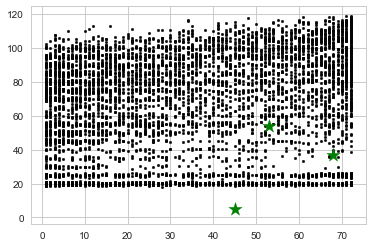

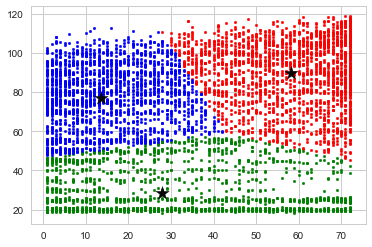

[[58.109108 89.97608 ]
 [27.937447 28.401648]
 [13.482026 77.1633  ]]
[[27.91796382 28.51687   ]
 [13.52104618 77.32648141]
 [58.21693841 89.97214674]]


In [165]:
#get values and plot
f1=df['months'].values
f2=df['monthly_fee'].values
f3=df['gender'].values
f4=df['partner'].values
f5=df['family'].values
f6=df['senior'].values
f7=df['mobile'].values
f8=df['dual_sim'].values
f9=df['device_insurance'].values
f10=df['internet'].values
f11=df['web_security'].values
f12=df['cloud'].values
f13=df['support'].values
f14=df['tv_replay'].values
f15=df['subscription'].values
f16=df['paperless_invoice'].values
f17=df['total_revenue'].values

X= np.array(list(zip(f1,f2)))

#Eculidean distance calculater
def dist(a,b, ax=1):
	return np.linalg.norm(a-b, axis=ax)

#No of Clusters
k=3
#x corrodinates of centroids
C_x=np.random.randint(0, np.max(X)-20, size=k)
#x corrodinates of centroids
C_y=np.random.randint(0, np.max(X)-20, size=k)
C=np.array(list(zip(C_x, C_y)), dtype= np.float32)
print('-------------')
print(C)



#plotting alongside with Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker= '*', s=200, c='g')
plt.show()




# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)



colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.show()

#K-means model
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

In [166]:
# Task 4

In [169]:
# Classification

In [196]:
df.columns

Index(['customer_id', 'gender', 'partner', 'family', 'senior', 'mobile',
       'dual_sim', 'device_insurance', 'internet', 'web_security', 'cloud',
       'support', 'tv_replay', 'video_on_demand', 'subscription',
       'paperless_invoice', 'payment_method', 'monthly_fee', 'months',
       'total_revenue', 'churn'],
      dtype='object')

In [227]:
logreg=LogisticRegression()
#Updating the feature list
cols=["gender", "partner", "family", "senior", "mobile", "dual_sim", "device_insurance", 
      "internet", "web_security", "cloud", "support", "tv_replay", "video_on_demand", "subscription", "paperless_invoice", 
      "payment_method", "monthly_fee", "months","total_revenue"] 
X= df[['months','monthly_fee','total_revenue']]
y=df['churn']



In [228]:
#Model
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.467886
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7029
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Nov 2018   Pseudo R-squ.:                  0.1919
Time:                        12:29:16   Log-Likelihood:                -3290.2
converged:                       True   LL-Null:                       -4071.7
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
months           -0.1169      0.005    -25.261      0.000      -0.126      -0.108
monthly_fee       0.

## Task 2

## Task 3

## Task 4

## Task 5

## Task 6